![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

The Finance Toolkit is complimented very well with the [Finance Database 🌎](https://github.com/JerBouma/FinanceDatabase), a database that features 300.000+ symbols containing Equities, ETFs, Funds, Indices, Currencies, Cryptocurrencies and Money Markets. By utilising both, it is possible to do a fully-fledged competitive analysis with the tickers found from the FinanceDatabase inputted into the Finance Toolkit.

To install the **FinanceDatabase** it simply requires the following:

```
pip install financedatabase -U
```

From within Python use:

```python
import financedatabase as fd
```

For a detailed explanation of how to use the Finance Database, please see the GitHub page as found [here](https://github.com/JerBouma/FinanceDatabase).

To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://www.jeroenbouma.com/fmp">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use [their contact form](https://site.financialmodelingprep.com/contact) or provide the data yourself. 

In [1]:
from financetoolkit import Toolkit
import financedatabase as fd

API_KEY = "FINANCIAL_MODELING_PREP_KEY"

Lets start with searching for companies matching the industry `Road & Rail` in the `United States` that are defined as `Large Cap`.

In [2]:
# Initialize the Equities database
equities = fd.Equities()

# Obtain related companies
road_and_rail = equities.search(
    industry="Road & Rail",
    country="United States",
    market_cap="Large Cap",
    exclude_exchanges=True,
)

# Show the related DataFrame
road_and_rail

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
CSX,CSX Corporation,"CSX Corporation, together with its subsidiarie...",USD,Industrials,Transportation,Road & Rail,NMS,NASDAQ Global Select,United States,FL,Jacksonville,32202,http://www.csx.com,Large Cap,US1264081035,126408103,BBG000BGK1N1,BBG000BGJRC8,BBG001S5Q7Q3
KSU,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
KSU-P,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
NSC,Norfolk Southern Corporation,"Norfolk Southern Corporation, together with it...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,VA,Norfolk,23510-2191,http://www.norfolksouthern.com,Large Cap,US6558441084,655844108,BBG000BQ5GM4,BBG000BQ5DS5,BBG001S5TQJ6
UNP,Union Pacific Corporation,"Union Pacific Corporation, through its subsidi...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,NE,Omaha,68179,http://www.up.com,Large Cap,US9078181081,907818108,BBG000BW3413,BBG000BW3299,BBG001S5X2M0
WAB,Westinghouse Air Brake Technologies Corporation,Westinghouse Air Brake Technologies Corporatio...,USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15212,http://www.wabteccorp.com,Large Cap,US9297401088,929740108,BBG000BDDBD5,BBG000BDD940,BBG001S5XBT3


It appears that Kansas City Southern has been merged with Canadian Pacific Railway ([source](https://www.kcsouthern.com/media/news/news-releases/canadian-pacific-and-kansas-city-southern-combination-approved-by-u-s-surface-transportation-board)). Because of this, the ticker is taken out. The reason it still exists in the dataset of the FinanceDatabase is to control for survivorship bias.

In [3]:
road_and_rail = road_and_rail.drop(["KSU", "KSU-P"])

From here on, the tickers from the dataset are used to initialize the Finance Toolkit.

In [4]:
rail_companies = Toolkit(list(road_and_rail.index), api_key=API_KEY)

Let's start by showing the historical prices and plotting them accordingly.

Obtaining historical data: 100%|██████████| 5/5 [00:00<00:00,  9.53it/s]


Open                                 High                          \
             CSX    NSC    WAB Benchmark    UNP   CSX    NSC    WAB Benchmark   
date                                                                            
2013-12-16  9.24  88.83  69.72    178.95  80.68  9.31  89.84   70.9    179.81   
2013-12-17  9.31  89.35  70.62    179.38  80.92  9.32   89.6  71.71    179.41   
2013-12-18  9.24  89.26  71.75    178.92   80.8  9.34  90.79  74.17    181.73   
2013-12-19  9.29  90.35  73.81    181.18  81.49  9.32  90.53  73.89     181.7   
2013-12-20  9.28  90.47  76.92    180.69  82.11  9.42   92.0  77.64    181.99   
...          ...    ...    ...       ...    ...   ...    ...    ...       ...   
2023-12-05 33.45 226.63 119.48    455.26 232.79 33.45 226.97 119.73    457.59   
2023-12-06 33.52 225.11 119.49    458.81 233.12 33.57 228.74 120.47    458.84   
2023-12-07 33.73 229.04 118.79    456.91 232.42  33.8 229.11 118.99     458.9   
2023-12-08 33.45 227.46 118.74    457.46 231.64 33.49 227.64 119.75   460.745   
2023-12-11 33.24 221.94 118.69    459.69 229.92 33.32 222.96  119.3    462.17   

                   ... Excess Volatility                                 \
              UNP  ...               CSX    NSC    WAB Benchmark    UNP   
date               ...                                                    
2013-12-16  81.32  ...              0.02 0.0197 0.0216    0.0142 0.0184   
2013-12-17  80.92  ...              0.02 0.0197 0.0216    0.0142 0.0184   
2013-12-18  81.82  ...              0.02 0.0197 0.0216    0.0142 0.0184   
2013-12-19  82.16  ...              0.02 0.0197 0.0216    0.0142 0.0184   
2013-12-20  82.44  ...              0.02 0.0197 0.0216    0.0142 0.0184   
...           ...  ...               ...    ...    ...       ...    ...   
2023-12-05 233.13  ...              0.02 0.0197 0.0216    0.0142 0.0184   
2023-12-06 233.99  ...              0.02 0.0197 0.0216    0.0142 0.0184   
2023-12-07  232.9  ...              0.02 0.0197 0.0216    0.0142 0.0184   
2023-12-08 232.92  ...              0.02 0.0197 0.0216    0.0142 0.0184   
2023-12-11 232.34  ...              0.02 0.0197 0.0216    0.0142 0.0184   

           Cumulative Return                                 
                         CSX    NSC    WAB Benchmark    UNP  
date                                                         
2013-12-16               1.0    1.0    1.0       1.0    1.0  
2013-12-17            0.9937 0.9971 1.0127    0.9968 0.9959  
2013-12-18            1.0025 1.0148 1.0481    1.0138 1.0115  
2013-12-19            1.0013 1.0123 1.0436    1.0127 1.0155  
2013-12-20            1.0076 1.0214 1.0433    1.0185 1.0118  
...                      ...    ...    ...       ...    ...  
2023-12-05            4.2033 3.1251 1.7738    3.0566 3.5377  
2023-12-06            4.2323 3.1833 1.7653    3.0443   3.55  
2023-12-07            4.2298 3.1736 1.7738    3.0675 3.5472  
2023-12-08            4.1616 3.0844 1.7669    3.0807 3.5208  
2023-12-11            4.1919 3.0952 1.7788    3.0927 3.5549  

[2514 rows x 60 columns]

<Axes: title={'center': 'Cumulative Returns for the Rail Companies'}, xlabel='date'>

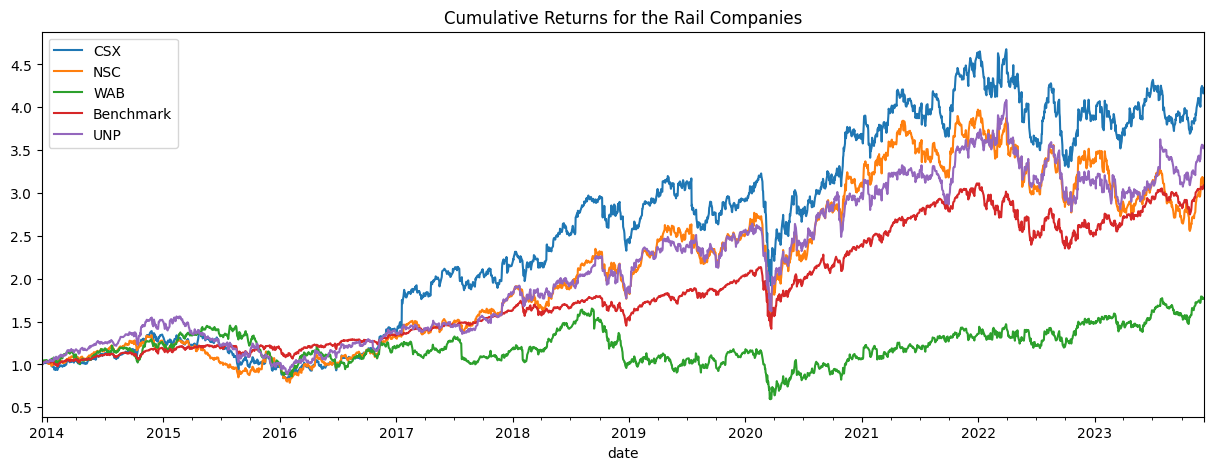

In [5]:
# Collect Historical Data for each ticker
historical_data = rail_companies.get_historical_data()

# Show a portion of the dataset
display(historical_data)

# Plot the Cumulative Returns
historical_data["Cumulative Return"].plot(
    figsize=(15, 5), title="Cumulative Returns for the Rail Companies"
)

Let's have a look at the Balance Sheet Statement as well.

In [6]:
# Collect and show the Balance Sheet Statements
rail_companies.get_balance_sheet_statement()

Obtaining exchange data: 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]


date                                        2013         2014         2015  \
CSX Cash and Cash Equivalents        592000000.0  669000000.0  628000000.0   
    Short Term Investments           487000000.0  292000000.0  810000000.0   
    Cash and Short Term Investments 1079000000.0  961000000.0 1438000000.0   
    Accounts Receivable             1052000000.0 1129000000.0  982000000.0   
    Inventory                        252000000.0  273000000.0  350000000.0   
...                                          ...          ...          ...   
WAB Minority Interest                  1908000.0    1056000.0    1732000.0   
    Total Liabilities and Equity    2821997000.0 3303841000.0 3300335000.0   
    Total Investments                        0.0  -43953000.0  -71658000.0   
    Total Debt                       450709000.0  521195000.0  695727000.0   
    Net Debt                         164949000.0   95346000.0  469536000.0   

date                                        2016         2017         2018  \
CSX Cash and Cash Equivalents        603000000.0  401000000.0  858000000.0   
    Short Term Investments           417000000.0   18000000.0  253000000.0   
    Cash and Short Term Investments 1020000000.0  419000000.0 1111000000.0   
    Accounts Receivable              938000000.0  970000000.0 1010000000.0   
    Inventory                        407000000.0  372000000.0  263000000.0   
...                                          ...          ...          ...   
WAB Minority Interest                770848000.0   19664000.0    3944000.0   
    Total Liabilities and Equity    6581018000.0 6579980000.0 8649234000.0   
    Total Investments               -245680000.0 -175902000.0 -198269000.0   
    Total Debt                      1892776000.0 1870528000.0 3792774000.0   
    Net Debt                        1494292000.0 1637127000.0 3211866000.0   

date                                         2019          2020          2021  \
CSX Cash and Cash Equivalents         958000000.0  3129000000.0  2239000000.0   
    Short Term Investments            996000000.0     2000000.0    77000000.0   
    Cash and Short Term Investments  1954000000.0  3131000000.0  2316000000.0   
    Accounts Receivable               986000000.0   912000000.0  1148000000.0   
    Inventory                         261000000.0   302000000.0   339000000.0   
...                                           ...           ...           ...   
WAB Minority Interest                  37100000.0    30400000.0    38000000.0   
    Total Liabilities and Equity    18886200000.0 18454500000.0 18454000000.0   
    Total Investments                -145300000.0  -168400000.0  -288000000.0   
    Total Debt                       4333600000.0  3792200000.0  4056000000.0   
    Net Debt                         3729400000.0  3193500000.0  3583000000.0   

date                                         2022  
CSX Cash and Cash Equivalents        1958000000.0  
    Short Term Investments            129000000.0  
    Cash and Short Term Investments  2087000000.0  
    Accounts Receivable              1313000000.0  
    Inventory                         341000000.0  
...                                           ...  
WAB Minority Interest                  45000000.0  
    Total Liabilities and Equity    18516000000.0  
    Total Investments                         0.0  
    Total Debt                       4002000000.0  
    Net Debt                         3461000000.0  

[172 rows x 10 columns]

A very important financial ratio is the "Operating Ratio" for railroad companies. An operating ratio of 80 or lower has generally been seen as good but having a target as low as the mid-70s is even better. From the table below, it is clear that all companies except for WAB (Westinghouse Air Brake Technologies Corporation) are performing very well. This, however, makes sense since WAB is specialized on providing parts instead of actual railroad services.

In [7]:
# Collect and show the Balance Sheet Statements
rail_companies.ratios.get_operating_ratio()

Obtaining cashflow data: 100%|██████████| 4/4 [00:00<00:00,  9.35it/s]


The following data was not provided within the Toolkit class and thus was retrieved from FinancialModelingPrep: Income Statement, Cash Flow Statement.


date,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,0.7095,0.7129,0.7049,0.698,0.6711,0.6164,0.5991,0.5896,0.5958,0.6195
NSC,0.7104,0.6924,0.7256,0.6891,0.6601,0.6545,0.6469,0.654,0.6009,0.6227
UNP,0.661,0.6351,0.6309,0.6353,0.6205,0.627,0.606,0.5989,0.5717,0.6013
WAB,0.8296,0.8269,0.8163,0.8436,0.8915,0.8915,0.9191,0.9015,0.888,0.8791


Other than this ratio, important other metrics are revenue growth, strong profit margins and efficient capital management. These can be explored further by looking into the income statement, the profit margin ratio and the current ratio.

In [8]:
# Obtain the income statement and select the revenues
revenues = rail_companies.get_income_statement().loc[:, "Revenue", :]

# Show revenue absolute numbers for each company
display(revenues)

# Show the revenue growth for each company
rail_companies.get_income_statement(growth=True).loc[:, "Revenue", :]

date,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,12026000000.0,12669000000.0,11811000000.0,11069000000.0,11408000000.0,12250000000.0,11937000000.0,10583000000.0,12522000000.0,14853000000.0
NSC,11245000000.0,11624000000.0,10511000000.0,9888000000.0,10551000000.0,11458000000.0,11296000000.0,9789000000.0,11142000000.0,12745000000.0
UNP,21963000000.0,23988000000.0,21813000000.0,19941000000.0,21240000000.0,22832000000.0,21708000000.0,19533000000.0,21804000000.0,24875000000.0
WAB,2566392000.0,3044454000.0,3307998000.0,2931188000.0,3881756000.0,4363547000.0,8200000000.0,7556100000.0,7822000000.0,8362000000.0


date,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,NaN,0.0535,-0.0677,-0.0628,0.0306,0.0738,-0.0256,-0.1134,0.1832,0.1862
NSC,NaN,0.0337,-0.0958,-0.0593,0.0671,0.086,-0.0141,-0.1334,0.1382,0.1439
UNP,NaN,0.0922,-0.0907,-0.0858,0.0651,0.075,-0.0492,-0.1002,0.1163,0.1408
WAB,NaN,0.1863,0.0866,-0.1139,0.3243,0.1241,0.8792,-0.0785,0.0352,0.069


Profit Margins can be looked at from a variety of perspectives. The Finance Toolkit features Gross, Operating, Net Profit and EBT Profit Margins. With the `collect_profitability_ratios` functions within the `ratios` module these can be collected for each company accompanied with many other useful ratios. To provide an appropriate overview, the profitability ratios are only shown for `CSX`.

In [9]:
# Collect the profitability ratios and select the ratios for CSX
rail_companies.ratios.collect_profitability_ratios().loc["CSX"]

date,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gross Margin,0.2888,0.2852,0.3034,0.3062,0.3307,0.3896,0.4083,0.4122,0.4105,0.3895
Operating Margin,0.2888,0.2852,0.3034,0.3062,0.3214,0.3975,0.4159,0.4122,0.4467,0.4055
Net Profit Margin,0.155,0.1521,0.1666,0.1548,0.4796,0.2701,0.279,0.2613,0.3019,0.2805
Interest Coverage Ratio,8.1441,8.7413,8.8088,8.1002,9.1245,9.7027,8.6866,7.6446,9.1953,9.9973
Income Before Tax Profit Margin,0.243,0.2403,0.2657,0.2476,0.2754,0.3513,0.3616,0.3427,0.3954,0.3645
Effective Tax Rate,0.3621,0.367,0.3728,0.3747,-0.7412,0.2312,0.2282,0.2377,0.2363,0.2305
Return on Assets (ROA),NaN,0.0594,0.0578,0.0487,0.1538,0.0913,0.0888,0.0709,0.0941,0.1011
Return on Equity (ROE),NaN,0.1778,0.1723,0.1467,0.4142,0.2423,0.2722,0.2212,0.284,0.3187
Return on Invested Capital (ROIC),NaN,0.079,0.0769,0.066,0.4346,0.1159,0.1139,0.0937,0.1182,0.1275
Return on Capital Employed (ROCE),0.1187,0.116,0.1113,0.0995,0.109,0.142,0.1399,0.116,0.1481,0.1561


Capital Management can be viewed from multiple angles including liquidity, accounts receivable, inventory and accounts payable management. These lead to the Operating and Cash Conversion Cycles. All of these ratios can be found within the `collect_efficiency_ratios` and `collect_liquidity_ratios` functions within the `ratios` module.

In [10]:
# Collect the liquidity ratios for all companies
rail_companies.ratios.collect_liquidity_ratios()

date                                          2013        2014         2015  \
CSX Current Ratio                           1.0734      1.2207       1.5195   
    Quick Ratio                             0.8791      0.9919       1.2398   
    Cash Ratio                              0.4451      0.4561       0.7367   
    Working Capital                    178000000.0 465000000.0 1014000000.0   
    Operating Cash Flow Ratio               1.3478      1.5866       1.7264   
    Operating Cash Flow to Sales Ratio      0.2717      0.2639       0.2853   
    Short Term Coverage Ratio                9.415      6.0018       5.9331   
NSC Current Ratio                           1.3341      1.5607       1.1802   
    Quick Ratio                             1.1215      1.1393       0.9175   
    Cash Ratio                              0.6772      0.5466       0.4935   
    Working Capital                    770000000.0 998000000.0  402000000.0   
    Operating Cash Flow Ratio               1.3354      1.6022       1.2896   
    Operating Cash Flow to Sales Ratio      0.2737      0.2454       0.2737   
    Short Term Coverage Ratio               -171.0     49.1724      22.8333   
UNP Current Ratio                           1.0525      1.2428       1.2882   
    Quick Ratio                             0.7507      0.8491       0.8568   
    Cash Ratio                              0.3777      0.4212       0.4339   
    Working Capital                    199000000.0 914000000.0  924000000.0   
    Operating Cash Flow Ratio               1.7998      1.9615       2.2907   
    Operating Cash Flow to Sales Ratio      0.3107      0.3079       0.3367   
    Short Term Coverage Ratio               5.3979      5.1072        5.444   
WAB Current Ratio                           2.3007      2.2169       2.4256   
    Quick Ratio                             1.4502      1.4308        1.241   
    Cash Ratio                              0.4932      0.5764       0.3403   
    Working Capital                    753647000.0 899062000.0  947672000.0   
    Operating Cash Flow Ratio               0.4067      0.6394       0.6743   
    Operating Cash Flow to Sales Ratio      0.0918      0.1552       0.1355   
    Short Term Coverage Ratio               0.3734      0.6364       0.5915   

date                                           2016         2017         2018  \
CSX Current Ratio                            1.2191       1.0111       1.3394   
    Quick Ratio                              0.9598       0.7334       1.1076   
    Cash Ratio                                  0.5       0.2212       0.5802   
    Working Capital                     447000000.0   21000000.0  650000000.0   
    Operating Cash Flow Ratio                1.4907       1.8332       2.4235   
    Operating Cash Flow to Sales Ratio       0.2747       0.3043       0.3789   
    Short Term Coverage Ratio                5.6419       7.0141      14.3241   
NSC Current Ratio                            0.9795       0.8444       0.7186   
    Quick Ratio                              0.8127       0.6464       0.5276   
    Cash Ratio                               0.4087       0.2711       0.1382   
    Working Capital                     -48000000.0 -396000000.0 -729000000.0   
    Operating Cash Flow Ratio                1.2971       1.2782       1.4381   
    Operating Cash Flow to Sales Ratio       0.3068       0.3083       0.3252   
    Short Term Coverage Ratio             -233.3846     -14.5223     -12.8927   
UNP Current Ratio                            0.9879       1.0251       0.8999   
    Quick Ratio                              0.7129       0.7256       0.6675   
    Cash Ratio                               0.3673       0.3465       0.2882   
    Working Capital                     -44000000.0   99000000.0 -463000000.0   
    Operating Cash Flow Ratio                2.0673       1.8355       1.8776   
    Operating Cash Flow to Sales Ratio       0.3774       0.3404       0.3804   
    Sho

In [11]:
# Collect the efficiency ratios for all companies
rail_companies.ratios.collect_efficiency_ratios()

date                                             2013     2014     2015  \
CSX Days of Inventory Outstanding (DIO)           NaN    10.58    13.82   
    Days of Sales Outstanding (DSO)               NaN  31.4178  32.6185   
    Operating Cycle (CC)                          NaN  41.9978  46.4386   
    Days of Accounts Payable Outstanding (DPO)    NaN  36.3146  35.6925   
    Cash Conversion Cycle (CCC)                   NaN   5.6832   10.746   
    Receivables Turnover                          NaN   0.0861   0.0894   
    Inventory Turnover Ratio                      NaN   34.499  26.4109   
    Accounts Payable Turnover Ratio               NaN  10.0511  10.2262   
    SGA-to-Revenue Ratio                          0.0      0.0      0.0   
    Fixed Asset Turnover                          NaN   0.4247   0.3776   
    Asset Turnover Ratio                          NaN   0.3908   0.3469   
    Operating Ratio                            0.7095   0.7129   0.7049   
NSC Days of Inventory Outstanding (DIO)           NaN  11.7833  13.9118   
    Days of Sales Outstanding (DSO)               NaN  32.6409  34.7429   
    Operating Cycle (CC)                          NaN  44.4242  48.6547   
    Days of Accounts Payable Outstanding (DPO)    NaN  64.1279  63.7694   
    Cash Conversion Cycle (CCC)                   NaN -19.7037 -15.1147   
    Receivables Turnover                          NaN   0.0894   0.0952   
    Inventory Turnover Ratio                      NaN   30.976  26.2367   
    Accounts Payable Turnover Ratio               NaN   5.6918   5.7238   
    SGA-to-Revenue Ratio                       0.0058   0.0095   0.0131   
    Fixed Asset Turnover                          NaN   0.3883   0.3386   
    Asset Turnover Ratio                          NaN   0.3537   0.3114   
    Operating Ratio                            0.7104   0.6924   0.7256   
UNP Days of Inventory Outstanding (DIO)           NaN  17.4071  20.5858   
    Days of Sales Outstanding (DSO)               NaN  23.0141  24.8236   
    Operating Cycle (CC)                          NaN  40.4212  45.4094   
    Days of Accounts Payable Outstanding (DPO)    NaN  21.4241  23.0311   
    Cash Conversion Cycle (CCC)                   NaN  18.9971  22.3783   
    Receivables Turnover                          NaN   0.0631    0.068   
    Inventory Turnover Ratio                      NaN  20.9685  17.7307   
    Accounts Payable Turnover Ratio               NaN  17.0369  15.8481   
    SGA-to-Revenue Ratio                          0.0      0.0      0.0   
    Fixed Asset Turnover                          NaN   0.5116   0.4429   
    Asset Turnover Ratio                          NaN   0.4683   0.4065   
    Operating Ratio                             0.661   0.6351   0.6309   
WAB Days of Inventory Outstanding (DIO)           NaN  79.1272  79.8997   
    Days of Sales Outstanding (DSO)               NaN  71.0786  67.8591   
    Operating Cycle (CC)                          NaN 150.2058 147.7588   
    Days of Accounts Payable Outstanding (DPO)    NaN  62.8836   58.086   
    Cash Conversion Cycle (CCC)                   NaN  87.3222  89.6728   
    Receivables Turnover                          NaN   0.1947   0.1859   
    Inventory Turnover Ratio                      NaN   4.6128   4.5682   
    Accounts Payable Turnover Ratio               NaN   5.8044   6.2838   
    SGA-to-Revenue Ratio                       0.1024   0.1066    0.105   
    Fixed Asset Turnover                          NaN     1.93   1.9726   
    Asset Turnover Ratio                          NaN    0.994   1.0018   
    Operating Ratio                            0.8296   0.8269   0.8163   

date                                               2016     2017     2018  \
CSX Days of Inventory Outstanding (DIO)         17.9886  18.6205  15.4992   
    Days of Sales Outstanding (DSO)              31.656  30.5233   29.498   
    Operating Cycle (CC)                        49.6446  49.1438  44.9972   
    Days of Acco